In [3]:
import numpy as np
import pandas as pd

In [20]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# df = pd.read_csv('')

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


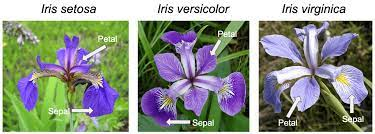

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [9]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','category']

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y = df['category']

In [16]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: category, Length: 150, dtype: object

In [19]:
y.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: category, dtype: int64

In [21]:
label_encoder = LabelEncoder()

In [22]:
y_encoded = label_encoder.fit_transform(y)

In [23]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.25,random_state=42)

In [29]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [30]:
from sklearn.ensemble import AdaBoostClassifier

* base_estimator : The default base_estimator is Decission Tree, You can even change your base estimator to any other algorithm.

* n_estimator : the number of times the model has to iteratively run

In [31]:
abc = AdaBoostClassifier(n_estimators=10,learning_rate=1.0)

In [32]:
# Training the Adaboost classifier.
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [33]:
y_pred = abc.predict(X_test)

In [34]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print(f'Accuracy Score of AdaBoost Classifier {accuracy_score(y_test,y_pred)}')

Accuracy Score of AdaBoost Classifier 1.0


In [37]:
from sklearn.svm import SVC

In [ ]:
# for i in range(1,11):
#     AdaBoostClassifier(n_estimators=i,base_estimator=SVC,learning_rate=1)
#     print()
#     print()
#     print('==================================================')